# Segmentación de Imágenes con YOLOv8

## Introducción
En este notebook, realizaremos la segmentación de una imagen proporcionada mediante una URL utilizando el modelo YOLOv8 preentrenado para segmentación. Mostraremos tanto la imagen original como la imagen segmentada, utilizando matplotlib para visualizar las imágenes.


## Instalación de la Librería YOLO
Primero, instalamos la librería `ultralytics`, que contiene las implementaciones de los modelos YOLO.

In [22]:
!pip -q install ultralytics

## Importación de Librerías
A continuación, importamos las librerías necesarias:
- **YOLO** desde `ultralytics`: para cargar y ejecutar el modelo.
- **requests**: para descargar la imagen desde una URL.
- **matplotlib**: para visualizar las imágenes dentro del notebook.
- **numpy**
- **cv2**


In [23]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import requests
import numpy as np
import cv2

## Flujo de ejecución

1. **Cargar el modelo**:
   - Se utiliza el modelo `yolov8n-seg.pt`, que es un modelo pequeño preentrenado para segmentación.
2. **Descargar la imagen**:
   - Se descarga la imagen desde la URL proporcionada.
3. **Inferencia con el modelo**:
   - Se ejecuta la segmentación sobre la imagen cargada.
4. **Mostrar las imágenes**:
   - Se muestra la imagen original y la imagen segmentada utilizando matplotlib.


In [24]:
def load_model():
    """
    Carga el modelo YOLOv8 preentrenado para segmentación.
    """
    return YOLO('yolov8n-seg.pt')

In [25]:

def download_image(url):
    """
    Descarga una imagen desde una URL y la convierte a formato PIL.Image.
    Args:
        url (str): URL de la imagen.
    """
    response = requests.get(url, stream=True).raw
    image = cv2.imdecode(np.asarray(bytearray(response.read()), dtype=np.uint8), cv2.IMREAD_COLOR)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [26]:
def show_images(original_image, segmented_image):
    """
    Muestra la imagen original y la segmentada utilizando matplotlib.
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))

    # Mostrar la imagen original
    axes[0].imshow(original_image)
    axes[0].axis('off')
    axes[0].set_title("Imagen Original")

    # Mostrar la imagen segmentada
    axes[1].imshow(segmented_image)
    axes[1].axis('off')
    axes[1].set_title("Imagen Segmentada")

    plt.tight_layout()
    plt.show()

In [27]:
def segment_image(image_url):
    # Cargar el modelo
    model = load_model()

    # Descargar la imagen
    image = download_image(image_url)
    
    # Realizar la predicción
    results = model(image)
    segmented_image = results[0].plot(labels=False, boxes=False, probs=False)

    # Mostrar las imagenes
    show_images(image, segmented_image)

## Ejemplo de Uso
Proporcionamos una URL de ejemplo de una imagen para realizar la segmentación.


0: 416x640 20 cars, 48.9ms
Speed: 1.3ms preprocess, 48.9ms inference, 7.0ms postprocess per image at shape (1, 3, 416, 640)


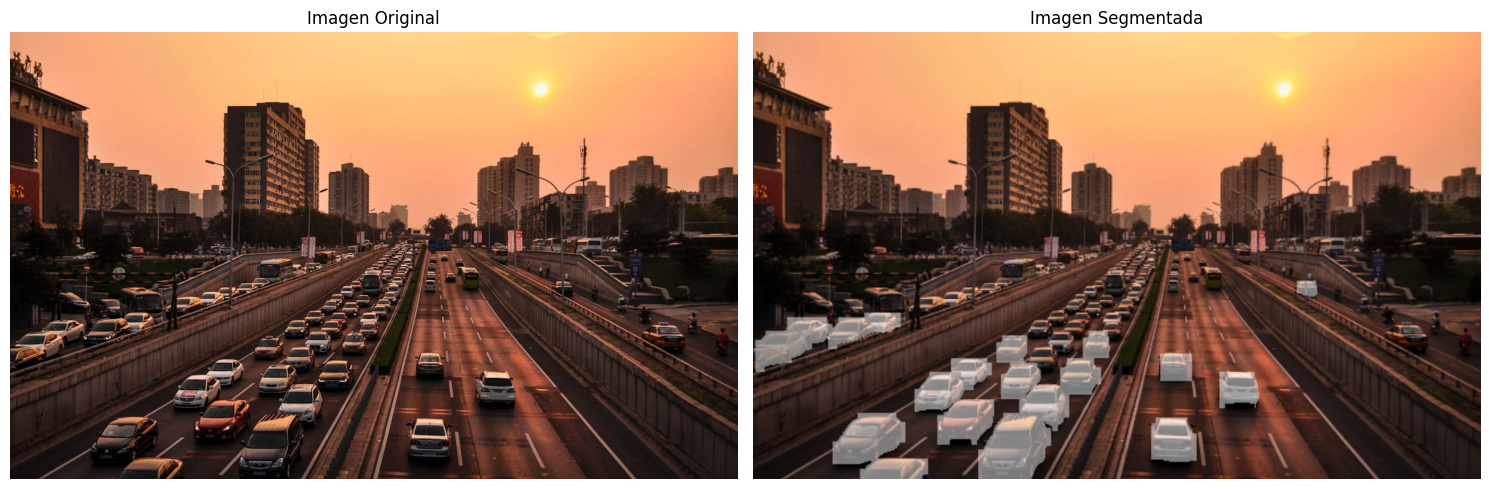


0: 448x640 4 persons, 56.9ms
Speed: 2.9ms preprocess, 56.9ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)


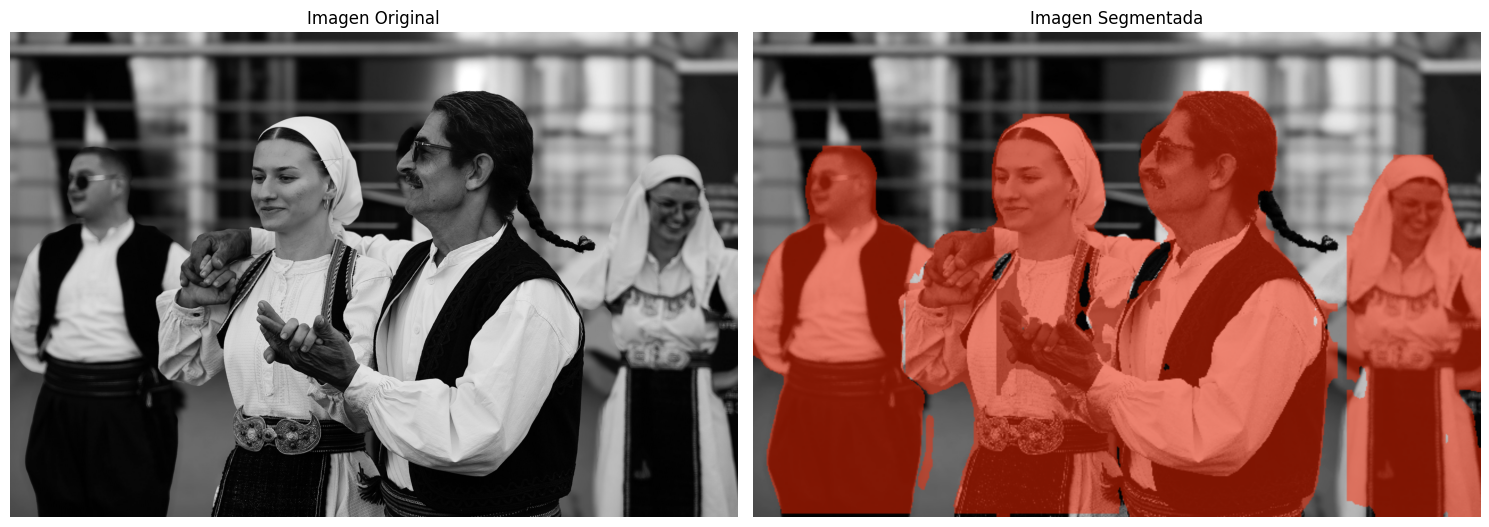

In [28]:
image_url = 'https://images.pexels.com/photos/210182/pexels-photo-210182.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1'
segment_image(image_url)

image_url = 'https://images.pexels.com/photos/30192151/pexels-photo-30192151/free-photo-of-traditional-dance-in-sarajevo-celebration.jpeg'
segment_image(image_url)
